# Filtering data with conditionals in Pandas
Pandas makes it easy to select, analyze, and process subsets of your data based on some condition `C`. This is accomplished with easily understandable syntax: `df[C]` will return a subset of DataFrame `df` that **matches** the condition `C` listed inside brackets `[]`.

* we can create filtering criteria using familiar mathematical operators that were used in Python conditionals.

* **Helpful Tip:** `.isin(L)`: is equal to any value contained in the list `L`.

In [1]:
import pandas as pd
import numpy as np

# Create a new dataframe with 5 rows and 3 columns
df = pd.DataFrame({
    'A': np.random.randint(0, 100, size=5),
    'B': np.random.randn(5),
    'Class': ['cat', 'dog', 'bird', 'cat', 'dog']
})
df


,A,B,Class
0,70,-1.517195,cat
1,7,0.083854,dog
2,7,-1.236728,bird
3,7,-0.079558,cat
4,20,-0.044035,dog


In [3]:
# Example 1: Filter rows where column A is greater than 50
print("Rows where A > 50:")
print(df[df['A'] > 50])
print()



# Example 2: Filter rows with multiple conditions (using & for AND)
print("Rows where A > 30 AND B > 0:")
print(df[(df['A'] > 30) & (df['B'] > 0)])
print()

# Example 3: Filter rows with OR condition
print("Rows where Class is 'cat' OR 'dog':")
print(df[(df['Class'] == 'cat') | (df['Class'] == 'dog')])
print()

# Example 5: Combining filters with column selection
print("Rows with cats and B is negative:")
print(df[(df['Class'] == 'cat') & (df['B'] < 0)])

Rows where A > 50:
    A         B Class
0  70 -1.517195   cat

Rows where A > 30 AND B > 0:
Empty DataFrame
Columns: [A, B, Class]
Index: []

Rows where Class is 'cat' OR 'dog':
    A         B Class
0  70 -1.517195   cat
1   7  0.083854   dog
3   7 -0.079558   cat
4  20 -0.044035   dog

Rows with cats and B is negative:
    A         B Class
0  70 -1.517195   cat
3   7 -0.079558   cat


## Indexing and Iteration

### Accessing Data in DataFrames

- Use `.iloc[]` for integer position-based indexing (e.g., df.iloc[0, 1] for first row, second column)
- Use `.loc[]` for label-based indexing (e.g., df.loc['row_label', 'column_name'])

- Example:
  - df.iloc[0, 1] gets value in first row, second column regardless of labels
  - df.loc['A', 'price'] gets value where index='A' and column='price'


In [4]:
df

,A,B,Class
0,70,-1.517195,cat
1,7,0.083854,dog
2,7,-1.236728,bird
3,7,-0.079558,cat
4,20,-0.044035,dog


In [6]:
# Example 1: Using iloc for integer-based indexing
print("First row, second column using iloc:")
print(df.iloc[0, 1])
print()

# Example 2: Using loc for label-based indexing
print("Accessing row 0, column 'B' using loc:")
print(df.loc[0, 'B'])
print()

# Example 3: Selecting multiple rows and columns with iloc
print("First 3 rows, columns 0 and 2 using iloc:")
print(df.iloc[0:3, [0, 2]])
print()

# Example 4: Selecting multiple rows and columns with loc
# NOT ON TEST
print("First 3 rows, columns 'A' and 'Class' using loc:")
print()
print()



First row, second column using iloc:
-1.5171946503149143

Accessing row 0, column 'B' using loc:
-1.5171946503149143

First 3 rows, columns 0 and 2 using iloc:
    A Class
0  70   cat
1   7   dog
2   7  bird

First 3 rows, columns 'A' and 'Class' using loc:




## Types of Machine Learning
### Supervised Learning
- Learning from labeled data
- Algorithm is trained on input-output pairs
- Goal: Learn a mapping from inputs to outputs
- Examples: Classification, Regression
### Unsupervised Learning
- Learning from unlabeled data
- Algorithm finds patterns or structure in data on its own
- Goal: Discover hidden patterns or intrinsic structures
- Examples: Clustering, Dimensionality reduction, Association
### Reinforcement Learning
- Learning through interaction with an environment
- Agent learns by receiving rewards or penalties
- Goal: Learn a policy that maximizes cumulative reward


## Data Splitting in Machine Learning

### Training Set
- The portion of data used to train the model
- Typically 60-80% of the available data
- The model learns patterns, relationships, and parameters from this data
- Used to fit the model's parameters through optimization algorithms

### Validation Set
- Used to tune hyperparameters and evaluate model performance during development
- Typically 10-20% of the available data
- Helps prevent overfitting by providing an unbiased evaluation during training
- Used for model selection, early stopping, and hyperparameter tuning

### Test Set
- Completely separate data used for final model evaluation
- Typically 10-20% of the available data
- Never used during model training or tuning
- Provides an unbiased estimate of model performance on unseen data
- Simulates how the model will perform in real-world applications

### Importance of Proper Data Splitting
- Ensures model generalizability to new, unseen data
- Helps detect and prevent overfitting
- Provides reliable performance metrics for model evaluation
- Critical for building robust and trustworthy machine learning models


### Model Performance Reporting Best Practices

- **Always report performance metrics on the test set only**, never on training or validation data
- Test set results provide an unbiased estimate of how your model will perform on new, unseen data
- Reporting training set performance can be misleading as it doesn't reflect generalization ability


## Confusion Matrices and Classification Metrics

### Confusion Matrix
- A table that visualizes the performance of a classification model
- Shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)
- Rows represent actual classes, columns represent predicted classes
- Helps identify which classes are being confused by the model

### Classification Metrics
- **Accuracy**: Overall correctness of the model
- **Precision**: Proportion of positive identifications that were actually correct
- **Recall (Sensitivity)**: Proportion of actual positives that were correctly identified
- **F1 Score**: Harmonic mean of precision and recall
- **Specificity**: Proportion of actual negatives that were correctly identified

### Interpreting Confusion Matrices
- Diagonal elements represent correct predictions
- Off-diagonal elements represent misclassifications
- Useful for understanding model performance, especially with imbalanced datasets
- Helps identify specific types of errors the model is making


<center><image src="https://github.com/uf-bme/bme3053c/raw/main/files/confusion_matrix.png" height="300"/></center>


Combined Results DataFrame:
   Ground_Truth  Prediction
0             1           1
1             0           0
2             1           1
3             1           0
4             0           0
5             1           1
6             0           1
7             0           0
8             1           1
9             0           1

Confusion Matrix:
[[3 2]
 [1 4]]


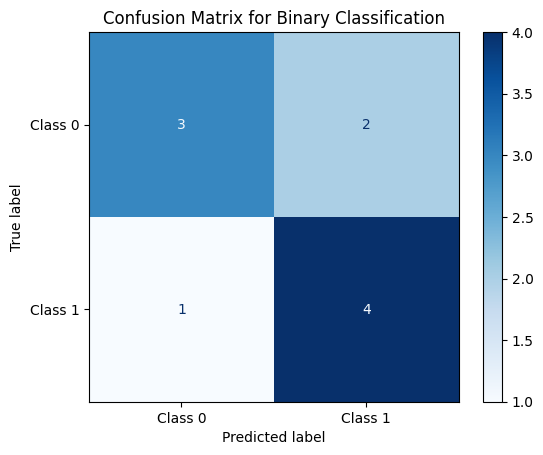

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create ground truth labels (actual values)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

# Create predicted labels (model predictions)
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

# Combine into a DataFrame
results_df = pd.DataFrame({
    'Ground_Truth': y_true,
    'Prediction': y_pred
})

# Display the DataFrame
print("Combined Results DataFrame:")
print(results_df)

# Create and display confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Binary Classification')
plt.show()


- **Accuracy**: The proportion of correctly classified samples.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


In [9]:
# Calculate accuracy from the confusion matrix
# Confusion matrix format:
# [[TN, FP],
#  [FN, TP]]

# Extract values from confusion matrix
tn, fp = cm[0]
fn, tp = cm[1]

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Display result
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7000


- **Precision and Recall**:
  - **Precision**: The proportion of positive predictions that are actually correct. It answers the question "Of all cases we predicted as positive, what fraction were truly positive?"
    - $Precision = \frac{TP}{TP + FP}$
  - **Recall**: The proportion of actual positive cases that were correctly identified. It answers the question "Of all the actual positive cases, what fraction did we catch?"
    - $Recall = \frac{TP}{TP + FN}$
  - In medical contexts, high precision means fewer false alarms, while high recall means fewer missed diagnoses.


In [13]:
# Calculate precision and recall from the confusion matrix
# Confusion matrix format:
# [[Tp, Fn],
#  [Fp, Tn]]

# Extract values from confusion matrix
tp, fn = cm[0]
fp, tn = cm[1]

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

# Display results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Precision: 0.7500
Recall: 0.6000


- **F1 Score**: The harmonic mean of precision and recall, useful for imbalanced classes.

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

In biomedical applications, high accuracy and recall are often critical, as false negatives (missed cases) could have serious consequences.



In [11]:
# Calculate F1 score using precision and recall
f1_score = 2 * (precision * recall) / (precision + recall)

# Display result
print(f"F1 Score: {f1_score:.4f}")


F1 Score: 0.7273


## Transformation Matrices in Homogeneous Coordinates
<center><img  src="https://github.com/uf-bme/bme3053c/raw/main/files/2D_affine_transformation_matrix.svg" alt='Matrix Transformations'/></center>

### Example: Rotation + Scaling + Translation
We can also combine rotation, scaling, and translation in one step by multiplying their respective matrices together:


$$Combined=T⋅S⋅R(θ)$$

This order applies the rotation first, then scaling, and finally translation.

In [19]:
import numpy as np

import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=False):
    '''
    This function generates the coordinates of a star shape based on the specified number of points,
    outer radius, inner radius, and center coordinates. The star is created by alternating between the
    outer and inner radii at calculated angles, resulting in a visually appealing star pattern.
    '''
    angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * num_points)
    x = radii * np.cos(angles) + center[0]
    y = radii * np.sin(angles) + center[1]
    return np.column_stack((x, y)) if not homogeneous else np.column_stack((x, y, np.ones(num_points*2)))

def plot_star(ax, star, title,global_view):
    ax.plot(star[:, 0], star[:, 1], 'b-')
    ax.plot([star[-1, 0], star[0, 0]], [star[-1, 1], star[0, 1]], 'b-')  # Connect last to first
    ax.set_title(title)
    ax.axis('equal')
    if global_view:
      ax.set_xlim(-10,10)
      ax.set_ylim(-10,10)
      ax.axhline(0, color='black')
      ax.axvline(0, color='black')

    ax.grid(True)  # Add grid

    star_center = np.mean(star, axis=0)
    arrow_start = star_center

    vector_to_point = star[0] - star_center
    direction = vector_to_point/np.linalg.norm(vector_to_point)  # Normalize the direction vector
    arrow_length = np.linalg.norm(vector_to_point)/2
    arrow_end = star_center + (arrow_length) * direction
    headwidth=6 if global_view else 8
    width = 1 if global_view else 2
    ###########################################
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(facecolor='green', shrink=0.05, width=width, headwidth=headwidth))

def plot_stars(stars,global_view=False):
    if len(stars) == 1 or not isinstance(stars, list):
        print("There must be a list of multiple stars to plot")
        return
    num_stars = len(stars)
    fig, axs = plt.subplots(1, num_stars, figsize=(10, 5))
    for i, star in enumerate(stars):
        plot_star(axs[i], star[:,:2], f'Star {i+1}',global_view)

def rotate(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta,0],
        [sin_theta, cos_theta,0],
        [0,0,1],
    ])


def scale(sx,sy):
    return np.array([
        [sx, 0,0],
        [0, sy,0],
        [0,0,1],
    ])

def translate(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

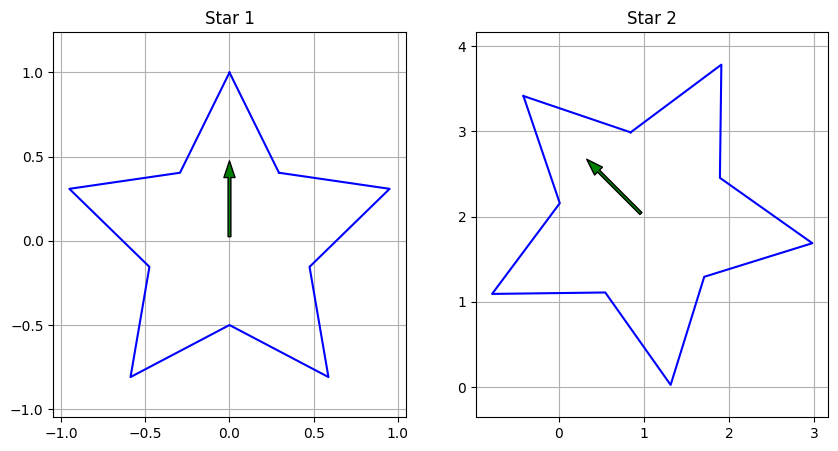

In [21]:
star=generate_star(homogeneous=True)

combined_transform =  translate(1,2) @scale(2,2)@ rotate(45)

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])

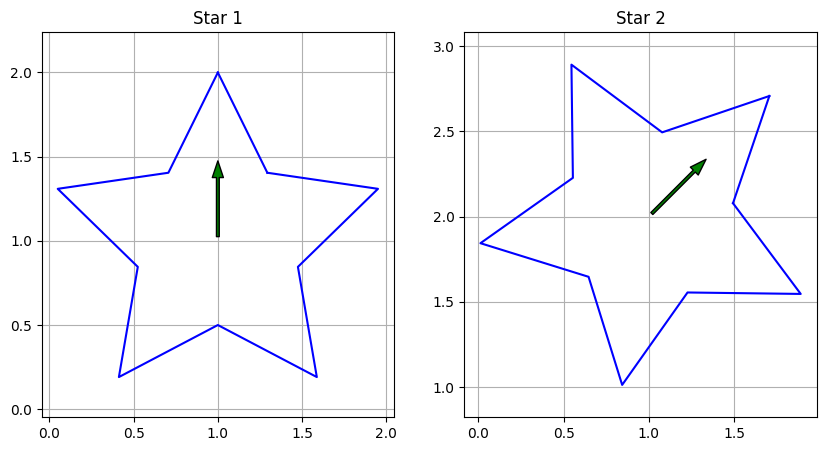

In [27]:
star=generate_star(center=(1,1),homogeneous=True)

combined_transform =  translate(1,2) @ rotate(-45)@translate(-1,-1)

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])

In [1]:
star=generate_star(center=(2,2),homogeneous=True)

combined_transform = translate(1,2) @ rotate(-45)@scale(2,2)@translate(-1,-1)

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])

NameError: name 'generate_star' is not defined

## **Good luck!**
